In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pybaseball import cache
cache.enable()
from pybaseball import statcast
from sklearn import preprocessing

In [2]:
data = statcast(start_dt = "2021-09-10", end_dt = "2024-09-10")
data.fillna(0)

This is a large query, it may take a moment to complete
Skipping offseason dates
Skipping offseason dates
Skipping offseason dates


100%|█████████████████████████████████████████| 739/739 [01:46<00:00,  6.93it/s]
/opt/anaconda3/lib/python3.12/site-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
2800,FF,2024-09-10,100.7,-2.76,6.45,"Martinez, Justin",673962,679885,strikeout,swinging_strike,...,1,0.88,0.49,0.49,44.3,5.601969,11.474194,35.089859,23.43065,21.600112
2876,SL,2024-09-10,91.4,-2.78,6.47,"Martinez, Justin",673962,679885,0,called_strike,...,1,2.24,-0.15,-0.15,46.8,0.0,0.0,0.0,0.0,0.0
2979,FF,2024-09-10,101.6,-3.03,6.29,"Martinez, Justin",673962,679885,0,foul,...,1,0.88,0.82,0.82,41.8,-6.026279,19.063218,44.78228,25.382642,22.602015
3090,SI,2024-09-10,102.1,-3.05,6.21,"Martinez, Justin",673962,679885,0,ball,...,1,1.65,1.42,1.42,39.4,0.0,0.0,0.0,0.0,0.0
3214,FF,2024-09-10,100.3,-3.08,6.36,"Martinez, Justin",663993,679885,strikeout,foul_tip,...,1,1.05,0.87,-0.87,41.0,-11.66197,36.605127,30.813325,42.462098,9.827972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,FC,2021-09-10,85.1,2.38,5.72,"Gonzales, Marco",606466,594835,0,called_strike,...,1,1.93,0.0,0.0,48.4,0.0,0.0,0.0,0.0,0.0
4006,FF,2021-09-10,88.1,1.96,5.99,"Gonzales, Marco",606466,594835,0,called_strike,...,1,1.43,0.76,-0.76,55.7,0.0,0.0,0.0,0.0,0.0
4151,CU,2021-09-10,75.6,2.57,5.66,"Gonzales, Marco",605113,594835,strikeout,swinging_strike_blocked,...,1,5.34,-0.3,0.3,45.8,0.0,0.0,0.0,0.0,0.0
4287,FF,2021-09-10,88.3,2.02,6.03,"Gonzales, Marco",605113,594835,0,swinging_strike,...,1,1.33,0.87,-0.87,56.4,0.0,0.0,0.0,0.0,0.0


In [331]:
unique_values = data['pitch_type'].unique()
pitch_dic = {value: index for index, value in enumerate(unique_values)}
data['pitch_type'] = data['pitch_type'].replace(pitch_dic)

In [333]:
kershaw = data[data['player_name'] == 'Kershaw, Clayton']

In [335]:
pitch_data = data[['pitch_type', 'release_speed', 'release_pos_x', 'zone', 'release_pos_z', 
                            'plate_x', 'plate_z', 'vx0',
                            'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot', 'effective_speed',
                            'release_spin_rate', 'release_extension', 'release_pos_y', 'spin_axis']]
pitch_data.loc[pitch_data['pitch_type'] == 17, 'pitch_type'] = 16

In [337]:
new_df = pitch_data.dropna()

In [339]:
new_df

,pitch_type,release_speed,release_pos_x,zone,release_pos_z,plate_x,plate_z,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,effective_speed,release_spin_rate,release_extension,release_pos_y,spin_axis
2800,0,100.7,-2.76,11,6.45,-0.93,3.78,6.194376,-146.519306,-5.292429,-8.424653,31.739446,-11.604972,3.65,1.7,100.8,2267,6.1,54.35,214
2876,1,91.4,-2.78,6,6.47,0.53,3.18,8.015788,-133.022164,-3.501904,0.308542,24.331647,-26.217575,3.81,1.82,92.0,2367,6.3,54.21,181
2979,0,101.6,-3.03,11,6.29,-0.97,2.76,7.700377,-147.640162,-7.775044,-13.898976,36.890503,-10.825341,3.65,1.7,101.2,2301,6.3,54.24,219
3090,2,102.1,-3.05,14,6.21,0.46,1.41,13.22499,-147.889857,-9.53915,-23.937375,34.678519,-21.781896,3.82,1.83,101.6,2299,6.3,54.25,225
3214,0,100.3,-3.08,2,6.36,-0.2,3.02,9.977773,-145.678587,-6.738815,-14.607984,32.639409,-13.383403,3.37,1.53,100.3,2193,6.3,54.24,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,4,85.1,2.38,1,5.72,-0.39,3.06,-6.501015,-123.937314,-2.378718,1.158427,22.829769,-19.59709,3.35,1.62,85.6,2154,6.4,54.09,152
4006,0,88.1,1.96,2,5.99,0.24,3.46,-5.776469,-128.210002,-3.187385,9.565111,26.275415,-15.116439,3.37,1.63,88.2,1957,6.4,54.15,149
4151,3,75.6,2.57,13,5.66,-0.8,-0.52,-6.462044,-109.876324,-3.350797,-1.168465,20.767391,-42.405672,3.47,1.59,75.1,2418,6.2,54.33,341
4287,0,88.3,2.02,11,6.03,-0.42,4.01,-7.762164,-128.409225,-2.145055,11.198545,25.700482,-14.336282,3.47,1.59,88.4,2216,6.3,54.19,153


In [341]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [343]:
ff = new_df.astype(np.int64).drop(columns = ['pitch_type'])
fy = new_df['pitch_type'].astype(np.int64) 

X_train = torch.tensor(np.array(ff), dtype = torch.float32)
Y_train = torch.tensor(np.array(fy), dtype=torch.long)

# Create Dataset and DataLoader
dataset = TensorDataset(X_train, Y_train)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


## Create MLP classifier

In [346]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(MLP, self).__init__()
        layers = []
        prev_size = input_size
        for h in hidden_sizes:
            layers.append(nn.Linear(prev_size, h))
            layers.append(nn.ReLU())
            prev_size = h
        layers.append(nn.Linear(prev_size, output_size))  # last layer = num_classes
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

num_classes = len(unique_values)  # since you have 18 values
model = MLP(input_size = X_train.shape[1], hidden_sizes=[64, 32, 32], output_size=num_classes)

In [348]:
print(model)


MLP(
  (net): Sequential(
    (0): Linear(in_features=19, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=18, bias=True)
  )
)


In [350]:
criterion = nn.CrossEntropyLoss()  # for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [352]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")


Epoch 1/10, Loss: 0.1509
Epoch 2/10, Loss: 0.8623
Epoch 3/10, Loss: 0.1081
Epoch 4/10, Loss: 0.5082
Epoch 5/10, Loss: 0.1540
Epoch 6/10, Loss: 0.9262
Epoch 7/10, Loss: 0.1552
Epoch 8/10, Loss: 0.1214
Epoch 9/10, Loss: 0.0939
Epoch 10/10, Loss: 0.8036


## Validation

In [14]:
vali = statcast(start_dt = "2024-09-11", end_dt = "2025-09-11")
data.fillna(0)

This is a large query, it may take a moment to complete
Skipping offseason dates


100%|█████████████████████████████████████████| 247/247 [00:40<00:00,  6.07it/s]
/opt/anaconda3/lib/python3.12/site-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
2800,0,2024-09-10,100.7,-2.76,6.45,"Martinez, Justin",673962,679885,strikeout,swinging_strike,...,1,0.88,0.49,0.49,44.3,5.601969,11.474194,35.089859,23.43065,21.600112
2876,1,2024-09-10,91.4,-2.78,6.47,"Martinez, Justin",673962,679885,0,called_strike,...,1,2.24,-0.15,-0.15,46.8,0.0,0.0,0.0,0.0,0.0
2979,0,2024-09-10,101.6,-3.03,6.29,"Martinez, Justin",673962,679885,0,foul,...,1,0.88,0.82,0.82,41.8,-6.026279,19.063218,44.78228,25.382642,22.602015
3090,2,2024-09-10,102.1,-3.05,6.21,"Martinez, Justin",673962,679885,0,ball,...,1,1.65,1.42,1.42,39.4,0.0,0.0,0.0,0.0,0.0
3214,0,2024-09-10,100.3,-3.08,6.36,"Martinez, Justin",663993,679885,strikeout,foul_tip,...,1,1.05,0.87,-0.87,41.0,-11.66197,36.605127,30.813325,42.462098,9.827972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,4,2021-09-10,85.1,2.38,5.72,"Gonzales, Marco",606466,594835,0,called_strike,...,1,1.93,0.0,0.0,48.4,0.0,0.0,0.0,0.0,0.0
4006,0,2021-09-10,88.1,1.96,5.99,"Gonzales, Marco",606466,594835,0,called_strike,...,1,1.43,0.76,-0.76,55.7,0.0,0.0,0.0,0.0,0.0
4151,3,2021-09-10,75.6,2.57,5.66,"Gonzales, Marco",605113,594835,strikeout,swinging_strike_blocked,...,1,5.34,-0.3,0.3,45.8,0.0,0.0,0.0,0.0,0.0
4287,0,2021-09-10,88.3,2.02,6.03,"Gonzales, Marco",605113,594835,0,swinging_strike,...,1,1.33,0.87,-0.87,56.4,0.0,0.0,0.0,0.0,0.0


In [354]:
vali['pitch_type'] = vali['pitch_type'].replace(pitch_dic)

In [356]:
val = vali[['pitch_type', 'release_speed', 'release_pos_x', 'zone', 'release_pos_z', 
                            'plate_x', 'plate_z', 'vx0',
                            'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot', 'effective_speed',
                            'release_spin_rate', 'release_extension', 'release_pos_y', 'spin_axis']].dropna()
val.loc[val['pitch_type'] == 17, 'pitch_type'] = 16

In [357]:
val[val['pitch_type'] == 16]

,pitch_type,release_speed,release_pos_x,zone,release_pos_z,plate_x,plate_z,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,effective_speed,release_spin_rate,release_extension,release_pos_y,spin_axis
535,16,80.6,-2.29,13,6.02,-1.63,2.39,2.495857,-117.409416,-1.919047,-5.499271,21.807475,-29.634558,3.44,1.65,80.6,1190,6.2,54.3,252
596,16,81.9,-2.12,13,5.99,-0.02,1.15,6.323002,-119.016158,-4.032295,-9.020859,24.648169,-32.819206,3.17,1.46,81.6,1230,6.3,54.18,250
616,16,80.9,-2.09,14,5.95,0.16,0.7,6.899225,-117.544987,-4.847653,-10.528547,22.612706,-32.349416,3.09,1.43,80.5,1208,6.2,54.35,251
653,16,81.9,-2.13,11,6.03,-1.39,2.88,2.304599,-119.366059,-0.796586,-3.58174,22.326544,-31.226164,3.25,1.49,81.7,1118,6.0,54.52,251
678,16,81.2,-2.23,14,6.05,0.28,1.07,6.624454,-118.06676,-4.617866,-6.373807,23.13149,-30.791798,3.17,1.46,80.9,1142,6.2,54.34,246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,16,82.6,-2.05,14,5.97,0.69,0.32,7.779488,-119.951783,-6.434263,-8.835024,24.194147,-30.711431,3.15,1.56,83.1,1204,6.9,53.65,250
416,16,84.1,-2.07,13,5.97,-0.54,1.11,5.766142,-122.248381,-4.899569,-11.982685,25.691165,-31.20795,3.2,1.55,84.8,1054,7.0,53.54,246
435,16,82.8,-2.15,14,6.03,0.46,1.23,6.678146,-120.514274,-4.744421,-4.609457,21.243986,-30.523551,3.71,1.78,83.7,1224,6.7,53.83,246
885,16,82.4,-2.22,14,6.0,0.0,1.03,7.102542,-119.962645,-4.543308,-11.333767,18.985826,-33.541267,3.24,1.75,83.5,1276,6.6,53.93,249


In [360]:
valfx = val.astype(np.int64).drop(columns = ['pitch_type'])
valfy = val['pitch_type'].astype(np.int64) 

X_val = torch.tensor(np.array(valfx), dtype = torch.float32)
Y_val = torch.tensor(np.array(valfy), dtype=torch.long)

# Create Dataset and DataLoader
val_dataset = TensorDataset(X_val, Y_val)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)


In [362]:
with torch.no_grad():
    y_pred = model(X_val)
    predicted_classes = torch.argmax(y_pred, dim=1)

In [364]:
outputs = model(X_val)             # shape: [batch_size, 18]
preds = torch.argmax(outputs, dim=1) # shape: [batch_size]
print(X_val)


tensor([[ 95.,   1.,   3.,  ...,   5.,  54., 147.],
        [ 93.,   1.,  12.,  ...,   5.,  54., 143.],
        [ 93.,   1.,   5.,  ...,   5.,  54., 136.],
        ...,
        [ 80.,  -2.,   6.,  ...,   6.,  53.,  61.],
        [ 94.,  -2.,  11.,  ...,   6.,  53., 226.],
        [ 93.,  -2.,   1.,  ...,   6.,  53., 217.]])


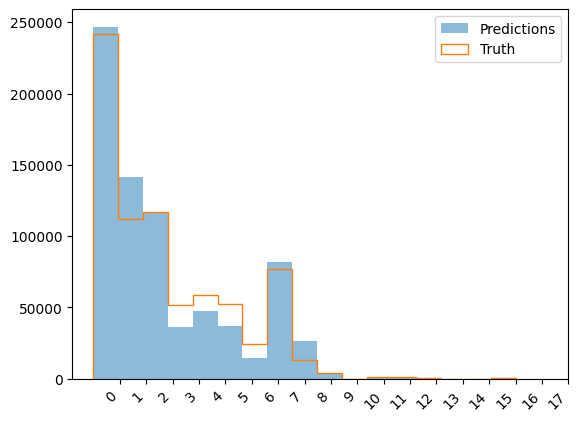

In [398]:
bins = np.linspace(
    min(preds.min(), Y_val.min()),
    max(preds.max(), Y_val.max()),
    18  # 17 bins → need 18 edges
)

plt.hist(preds, bins=bins, alpha=0.5, label = "Predictions")
plt.hist(Y_val, bins=bins, histtype='step', label = "Truth")

plt.xticks(
    ticks=np.arange(1,len(pitch_dic) + 1),
    labels=[pitch for pitch in pitch_dic],
    rotation=45, ha="right"
)

plt.legend()
plt.show()

In [368]:
np.unique(valfy)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [370]:
np.unique(Y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

## XGBoost classifier

In [373]:
import xgboost as xgb

In [375]:
valid_labels = np.unique(fy)  # classes the model knows
mask = np.isin(valfy, valid_labels)

X_val_filtered = valfx[mask]
y_val_filtered = valfy[mask]

y_unique = np.unique(fy)   # get unique classes
print("Unique labels:", y_unique)
#
## Make a mapping {old_label: new_label}
label_mapping = {old: new for new, old in enumerate(y_unique)}
print("Mapping:", label_mapping)


y_train_mapped = np.array([label_mapping[val] for val in fy])

Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Mapping: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16}


In [377]:
y_train_mapped

array([0, 1, 0, ..., 3, 0, 0])

In [379]:
xg_model = xgb.XGBClassifier(
    n_estimators=200,          # keep trees lower (instead of 1000)
    learning_rate=0.1,         # slightly higher LR to compensate fewer trees
    max_depth=6,               # shallower trees = faster
    subsample=0.8,             # use subset of rows
    colsample_bytree=0.8,      # use subset of features
    reg_lambda=1.0,
    reg_alpha=0.5,
    tree_method="hist",        # much faster than exact
    n_jobs=-1,                 # use all CPU cores
    verbosity=1
)
xg_model.fit(X_train, Y_train)


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [380]:
X_val

tensor([[ 95.,   1.,   3.,  ...,   5.,  54., 147.],
        [ 93.,   1.,  12.,  ...,   5.,  54., 143.],
        [ 93.,   1.,   5.,  ...,   5.,  54., 136.],
        ...,
        [ 80.,  -2.,   6.,  ...,   6.,  53.,  61.],
        [ 94.,  -2.,  11.,  ...,   6.,  53., 226.],
        [ 93.,  -2.,   1.,  ...,   6.,  53., 217.]])

In [381]:
xg_preds = xg_model.predict(valfx)

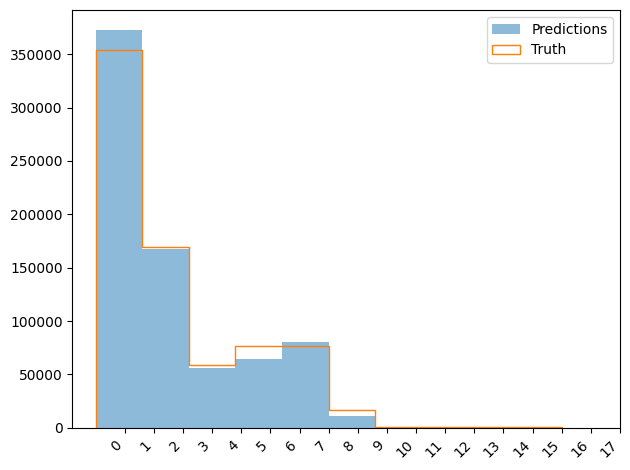

In [396]:
bins = np.linspace(
    min(preds.min(), Y_val.min()),
    max(preds.max(), Y_val.max()),
    18  # 17 bins → need 18 edges
)


plt.hist(xg_preds, alpha = 0.5, label = 'Predictions')
plt.hist(Y_val, histtype = 'step', label = 'Truth')

plt.xticks(
    ticks=np.arange(1, len(pitch_dic) + 1),
    labels=[pitch for pitch in pitch_dic],
    rotation=45, ha="right"
)

plt.legend()
plt.tight_layout()
plt.show()

In [388]:
np.sum(abs(np.array(Y_val - xg_preds)))

384642

In [390]:
correct = np.sum(np.array(Y_val == xg_preds) * 1)

In [392]:
correct / len(Y_val)

0.8473020080204311

In [394]:
(np.sum(np.array(Y_val == preds) * 1) / len(Y_val))

0.8085873423352455

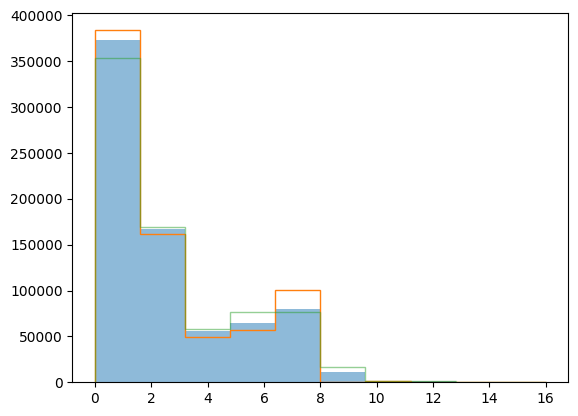

In [219]:
plt.hist(xg_preds, alpha = 0.5)
plt.hist(preds, histtype = 'step')
plt.hist(Y_val, histtype = 'step', alpha = 0.5)

bins = np.linspace(
    min(preds.min(), Y_val.min()),
    max(preds.max(), Y_val.max()),
    18  # 17 bins → need 18 edges
)



In [189]:
np.sum(np.array(preds == xg_preds) * 1) / len(preds)

0.8986536849895608